<a href="https://colab.research.google.com/github/moanas10/Cardiovascular-Disease-Prediction/blob/main/Cardiovascular_Disease_Prediction_%5B21k_3246%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries - For Data Preprocessing
import pandas as pd
import numpy as np

# For encoding and scaling
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
#Loading the Dataset
df = pd.read_csv("cardio_train.csv", sep=';')

In [ ]:
#Lets see what we have...
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
#Some column names are confusing...
# Rename columns to more understandable names
df.rename(columns={
    'id': 'id',
    'age': 'age',
    'gender': 'gender',
    'height': 'height_cm',
    'weight': 'weight_kg',
    'ap_hi': 'systolic_bp',
    'ap_lo': 'diastolic_bp',
    'cholesterol': 'cholesterol_level',
    'gluc': 'glucose_level',
    'smoke': 'smokes',
    'alco': 'alcohol_intake',
    'active': 'physical_activity',
    'cardio': 'has_cardio_disease'
}, inplace=True)

In [ ]:
#Basic info and checking for any missing values...
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  70000 non-null  int64  
 1   age                 70000 non-null  int64  
 2   gender              70000 non-null  int64  
 3   height_cm           70000 non-null  int64  
 4   weight_kg           70000 non-null  float64
 5   systolic_bp         70000 non-null  int64  
 6   diastolic_bp        70000 non-null  int64  
 7   cholesterol_level   70000 non-null  int64  
 8   glucose_level       70000 non-null  int64  
 9   smokes              70000 non-null  int64  
 10  alcohol_intake      70000 non-null  int64  
 11  physical_activity   70000 non-null  int64  
 12  has_cardio_disease  70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,0
id,0
age,0
gender,0
height_cm,0
weight_kg,0
systolic_bp,0
diastolic_bp,0
cholesterol_level,0
glucose_level,0
smokes,0


In [ ]:
#converting age in days to age in years
df['age'] = (df['age'] / 365).astype(int)

In [ ]:
#removing duplicates if any (duplicate entry)
df.drop_duplicates(inplace=True)

In [ ]:
# Filter unreasonable blood pressure values
df = df[(df['systolic_bp'] >= 80) & (df['systolic_bp'] <= 240)]
df = df[(df['diastolic_bp'] >= 40) & (df['diastolic_bp'] <= 180)]
#Systolic (ap_hi) and diastolic (ap_lo) pressures should be within realistic medical ranges.

In [ ]:
#Female: 0 & Male: 1
df['gender'] = df['gender'].map({1: 0, 2: 1})

In [ ]:
# We need to split input data (X) and target labels (y) for modeling.
X = df.drop('has_cardio_disease', axis=1)
y = df['has_cardio_disease']

In [ ]:
# Scaling ensures all features (like height, weight, ap_hi, etc.)
#are on a similar scale, preventing bias in distance- or gradient-based models.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Here comes EDA

In [ ]:
#EDA
# Statistical overview of the data
df.describe()

,id,age,gender,height_cm,weight_kg,systolic_bp,diastolic_bp,cholesterol_level,glucose_level,smokes,alcohol_intake,physical_activity,has_cardio_disease
count,68755.000000,68755.000000,68755.000000,68755.000000,68755.000000,68755.000000,68755.000000,68755.000000,68755.000000,68755.000000,68755.000000,68755.000000,68755.000000
mean,49975.250033,52.829409,0.348746,164.362272,74.124464,126.627300,81.374998,1.364773,1.225947,0.087994,0.053582,0.803418,0.495004
std,28845.426656,6.768641,0.476577,8.185588,14.331709,16.738807,9.639347,0.679033,0.571920,0.283288,0.225192,0.397416,0.499979
min,0.000000,29.000000,0.000000,55.000000,11.000000,80.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25002.500000,48.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50016.000000,53.000000,0.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74868.500000,58.000000,1.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,1.000000,250.000000,200.000000,240.000000,180.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Checking distribution of target variable - just see if the dataset is imbalanced or not
#Eg: 70% has_cardio, 30% not has_cardio
df['has_cardio_disease'].value_counts(normalize=True)

,proportion
has_cardio_disease,
0,0.504996
1,0.495004


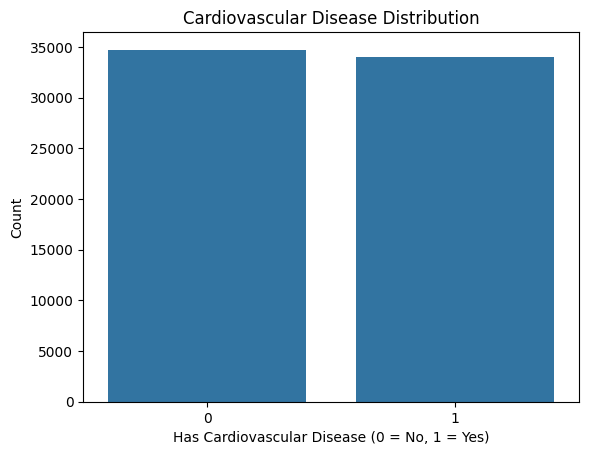

In [ ]:
#Now let's visualize class balance
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of the target variable
sns.countplot(x='has_cardio_disease', data=df)
plt.title("Cardiovascular Disease Distribution")
plt.xlabel("Has Cardiovascular Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

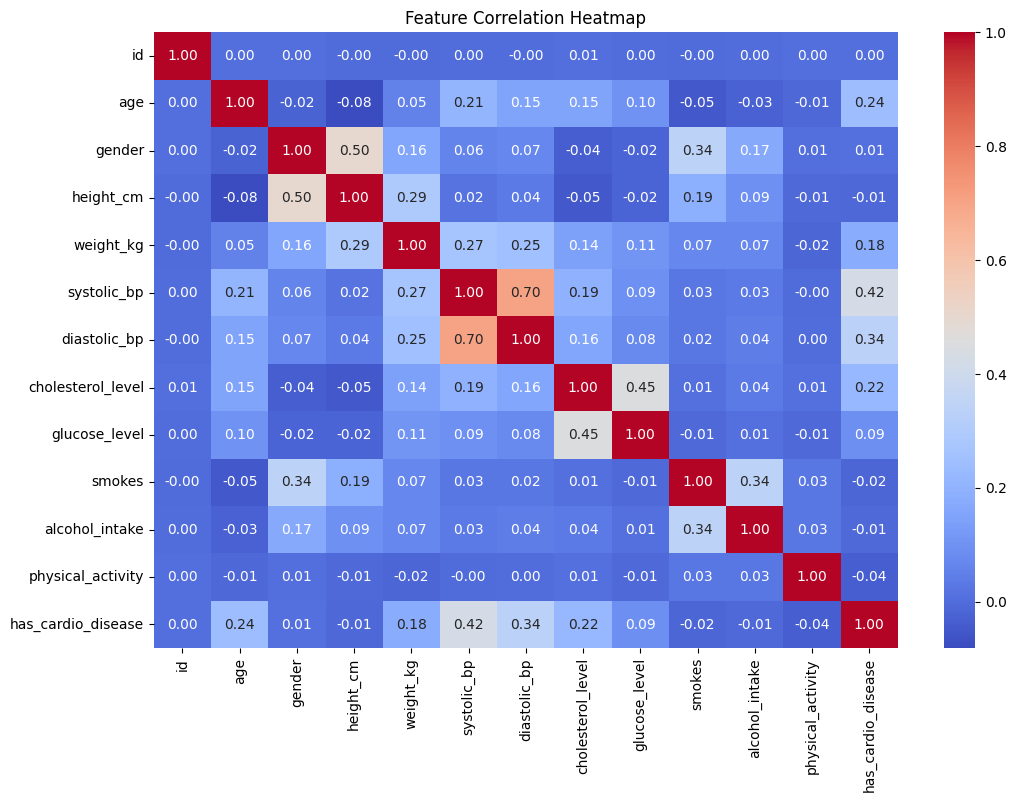

In [ ]:
#Chceking correlation of other variables with our target variable
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

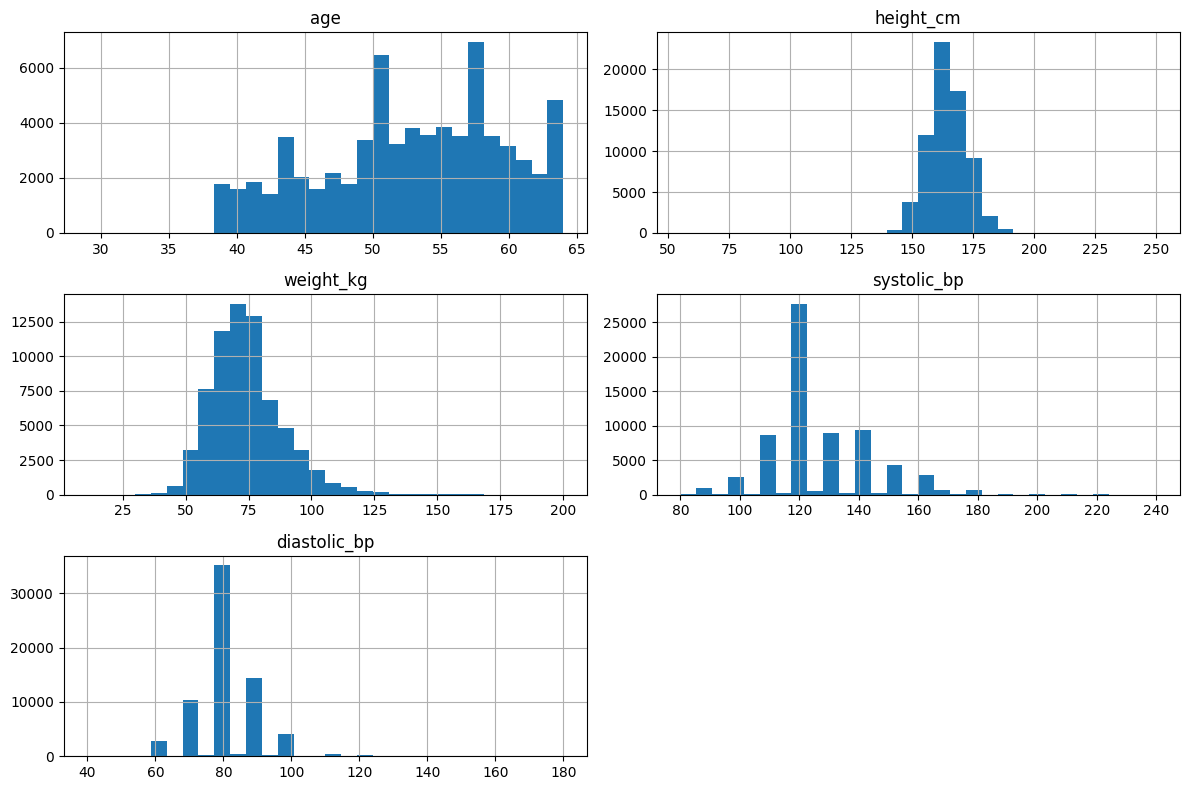

In [ ]:
#This is to spot skewness, outliers, and normality for numerical features
# Plotting histograms of numerical features
df[['age', 'height_cm', 'weight_kg', 'systolic_bp', 'diastolic_bp']].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

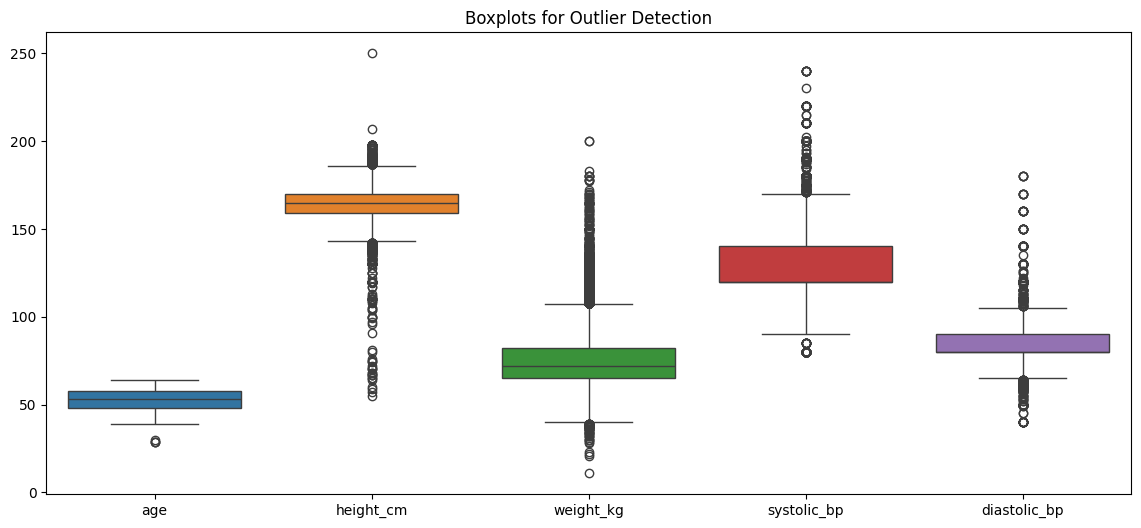

In [ ]:
#Outlier Detection for continuous numerical variables
# Boxplots
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[['age', 'height_cm', 'weight_kg', 'systolic_bp', 'diastolic_bp']])
plt.title("Boxplots for Outlier Detection")
plt.show()

In [ ]:
#Dealing with extreme outliers found in height, weight, sys_bp, & dia_bp
df = df[
    (df['height_cm'].between(120, 220)) &
    (df['weight_kg'].between(30, 180)) &
    (df['systolic_bp'].between(90, 200)) &
    (df['diastolic_bp'].between(40, 130))
].copy()

In [ ]:
#Cleaned rows
print("Cleaned rows :", len(df))

Cleaned rows : 68486


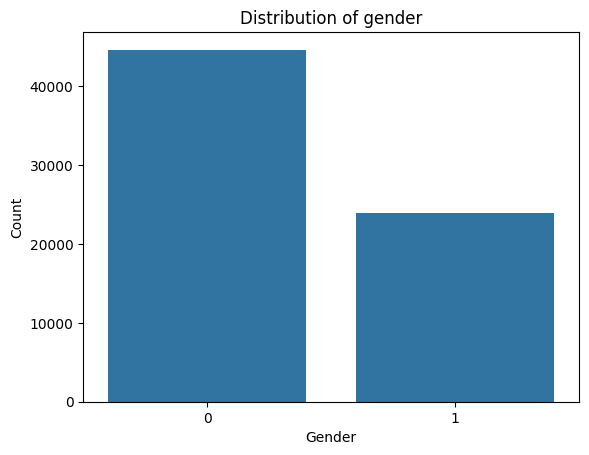

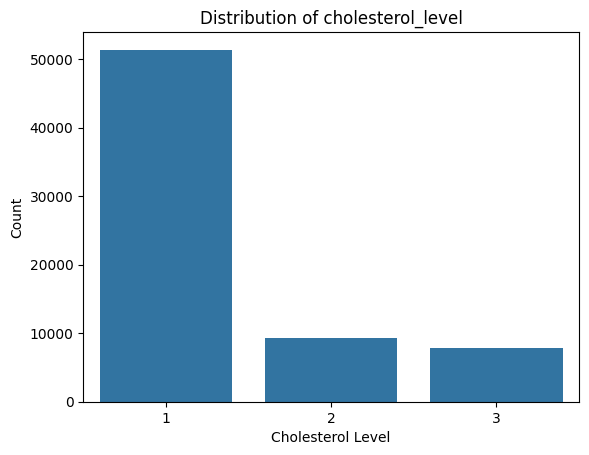

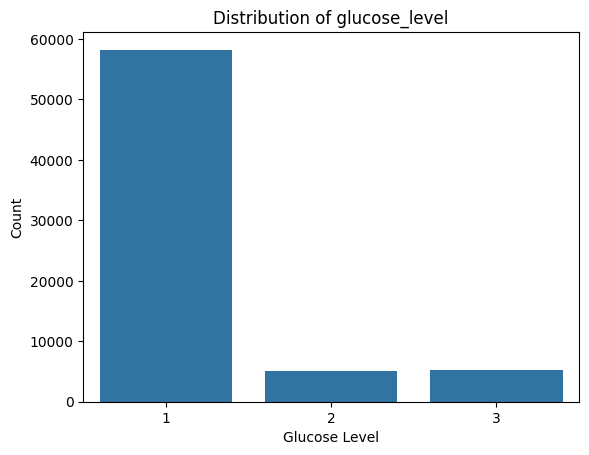

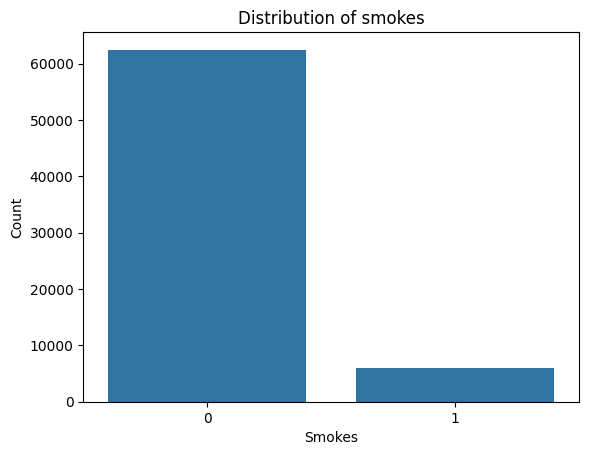

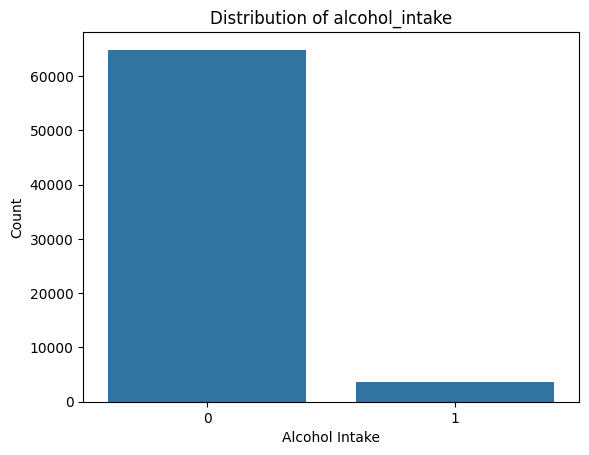

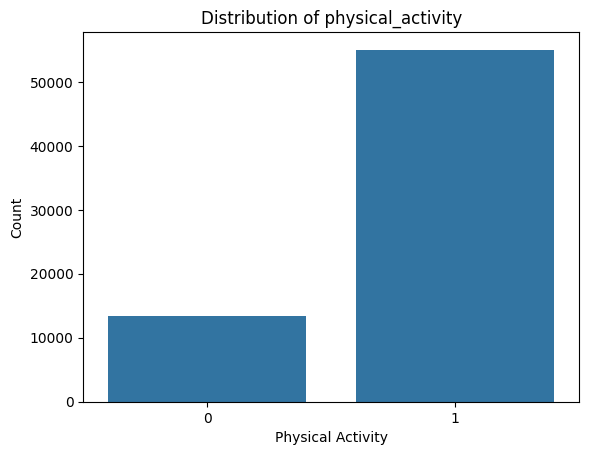

In [ ]:
#Categorical feature distribution
# Bar plots of categorical variables
categorical_cols = ['gender', 'cholesterol_level', 'glucose_level', 'smokes', 'alcohol_intake', 'physical_activity']

for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel("Count")
    plt.show()

In [ ]:
#Cholesterol and Glucose levels have very hight imbalances - New feature mapping
# 0 -> Normal & 1 -> elevated (both levels 2 and 3)
df['cholesterol_grouped'] = df['cholesterol_level'].apply(lambda x: 0 if x == 1 else 1)
df['glucose_grouped'] = df['glucose_level'].apply(lambda x: 0 if x == 1 else 1)

In [ ]:
#By fact, high levels of glucose over a long period of time increases the risk of Cardio Heart Disease!!
df.groupby('cholesterol_grouped')['has_cardio_disease'].mean()
df.groupby('glucose_grouped')['has_cardio_disease'].mean()

,has_cardio_disease
glucose_grouped,
0,0.475745
1,0.603161


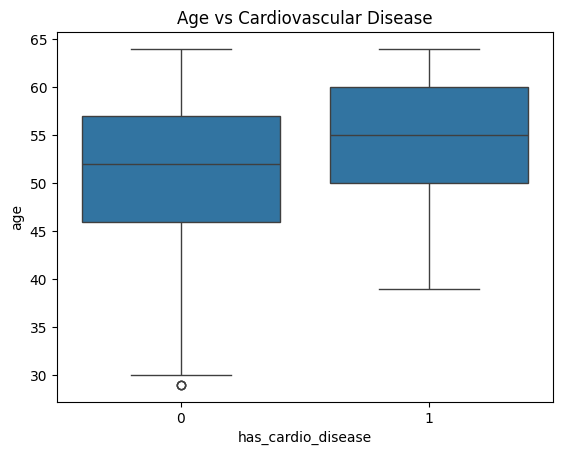

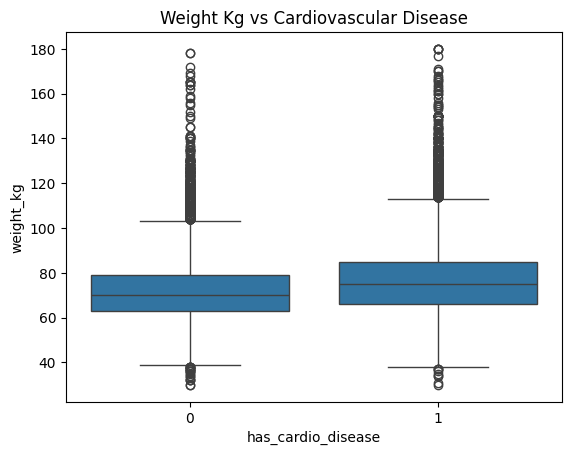

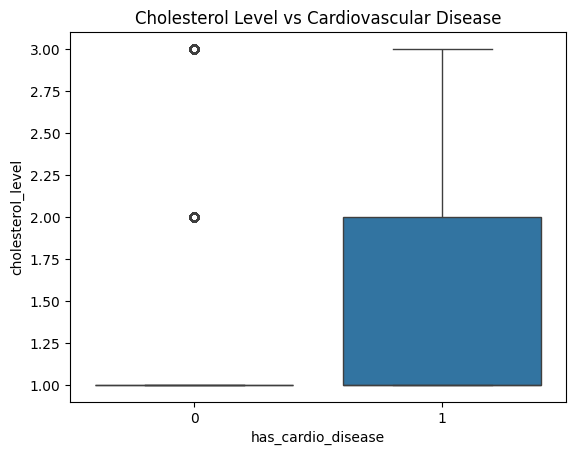

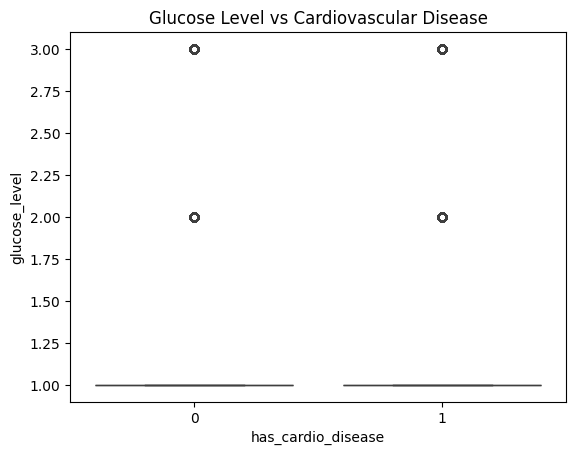

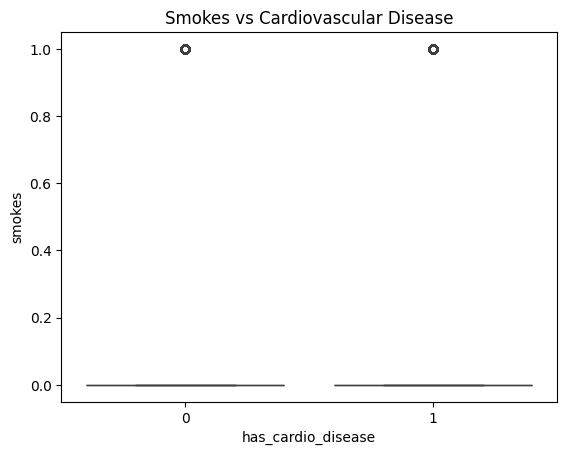

In [ ]:
# Visualize how selected features relate to target
features = ['age', 'weight_kg', 'cholesterol_level', 'glucose_level', 'smokes']

for col in features:
    sns.boxplot(x='has_cardio_disease', y=col, data=df)
    plt.title(f"{col.replace('_', ' ').title()} vs Cardiovascular Disease")
    plt.show()

In [ ]:
df

,id,age,gender,height_cm,weight_kg,systolic_bp,diastolic_bp,cholesterol_level,glucose_level,smokes,alcohol_intake,physical_activity,has_cardio_disease,cholesterol_grouped,glucose_grouped
0,0,50,1,168,62.0,110,80,1,1,0,0,1,0,0,0
1,1,55,0,156,85.0,140,90,3,1,0,0,1,1,1,0
2,2,51,0,165,64.0,130,70,3,1,0,0,0,1,1,0
3,3,48,1,169,82.0,150,100,1,1,0,0,1,1,0,0
4,4,47,0,156,56.0,100,60,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,1,168,76.0,120,80,1,1,1,0,1,0,0,0
69996,99995,61,0,158,126.0,140,90,2,2,0,0,1,1,1,1
69997,99996,52,1,183,105.0,180,90,3,1,0,1,0,1,1,0
69998,99998,61,0,163,72.0,135,80,1,2,0,0,0,1,0,1


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Redefine X, y and cleaning the DataFrame
X = df.drop(columns=['has_cardio_disease'])   #as input must not have target variable
y = df['has_cardio_disease']

In [ ]:
X['cholesterol_grouped'] = df['cholesterol_grouped']
X['glucose_grouped'] = df['glucose_grouped']
X.drop(['cholesterol_level', 'glucose_level'], axis=1, inplace=True)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [ ]:
# Building the DNN classifier model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compile
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Training the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7143 - loss: 0.5704 - val_accuracy: 0.7332 - val_loss: 0.5486
Epoch 2/20
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7257 - loss: 0.5519 - val_accuracy: 0.7324 - val_loss: 0.5469
Epoch 3/20
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7304 - loss: 0.5479 - val_accuracy: 0.7294 - val_loss: 0.5473
Epoch 4/20
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7294 - loss: 0.5471 - val_accuracy: 0.7280 - val_loss: 0.5473
Epoch 5/20
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7270 - loss: 0.5502 - val_accuracy: 0.7288 - val_loss: 0.5468
Epoch 6/20
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7302 - loss: 0.5474 - val_accuracy: 0.7289 - val_loss: 0.5480
Epoch 7/20
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7298 - loss: 0.5482 - val_accuracy: 0.7252 - val_loss: 0.5501
Epoch 8/20
1370/1370 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7303 - loss: 0.5453 - 

In [ ]:
# 8. Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")

429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7230 - loss: 0.5600

✅ Test Accuracy: 0.7301


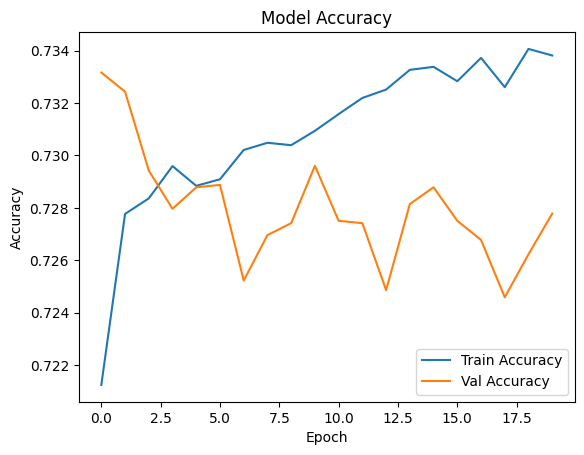

In [ ]:
#Plotting our model's training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Predicting class labels for test data - Just to see how well is our model trained :)
y_pred_prob = model.predict(X_test)  # Outputs probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to class labels

429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7301


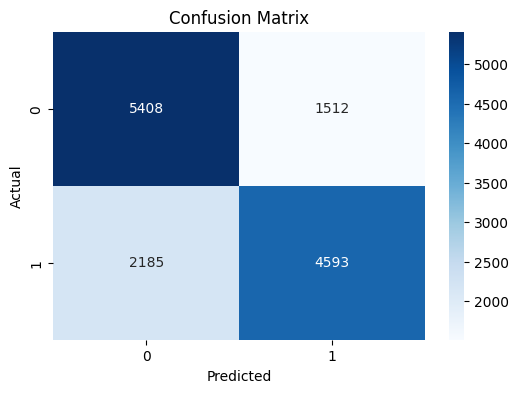

In [ ]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

We had a high amount of False Positive above = 2249. To reduce it, we Adjusted the Classification Threshold - By default, most classifiers use a 0.5 threshold (i.e., if predicted probability > 0.5 → class 1).
Lowering this can help catch more positives (increase recall).

In [ ]:
# For Keras, model.predict() returns probabilities
y_proba = model.predict(X_test)

# If your output layer is a single neuron with sigmoid activation, use:
y_proba = y_proba.flatten()

# Now apply custom threshold
threshold = 0.4
y_pred_threshold = (y_proba >= threshold).astype(int)

# Evaluate again
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_threshold))
print("\nClassification Report:\n", classification_report(y_test, y_pred_threshold))

429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
 [[4659 2261]
 [1526 5252]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71      6920
           1       0.70      0.77      0.74      6778

    accuracy                           0.72     13698
   macro avg       0.73      0.72      0.72     13698
weighted avg       0.73      0.72      0.72     13698



In [ ]:
#Evaluating new predictions
from sklearn.metrics import confusion_matrix, classification_report

y_proba = model.predict(X_test).flatten()

threshold = 0.4  # you can experiment with this
y_pred_custom = (y_proba >= threshold).astype(int)


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom))

429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix:
 [[4659 2261]
 [1526 5252]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71      6920
           1       0.70      0.77      0.74      6778

    accuracy                           0.72     13698
   macro avg       0.73      0.72      0.72     13698
weighted avg       0.73      0.72      0.72     13698



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load your trained model (or train it here)
# model = tf.keras.models.load_model('cardio_model.h5')  # if you saved it

# Or recreate your model architecture and load weights
def create_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to get user input
def get_user_input():
    print("Please enter the following health metrics:")

    data = {
        'id': [0],  # dummy ID
        'age': [int(input("Age (years): "))],
        'gender': [int(input("Gender (0 for female, 1 for male): "))],
        'height_cm': [float(input("Height (cm): "))],
        'weight_kg': [float(input("Weight (kg): "))],
        'systolic_bp': [int(input("Systolic blood pressure (mmHg): "))],
        'diastolic_bp': [int(input("Diastolic blood pressure (mmHg): "))],
        'cholesterol_level': [int(input("Cholesterol (1: normal, 2: above normal, 3: well above normal): "))],
        'glucose_level': [int(input("Glucose (1: normal, 2: above normal, 3: well above normal): "))],
        'smokes': [int(input("Smokes (1 for yes, 0 for no): "))],
        'alcohol_intake': [int(input("Alcohol intake (1 for yes, 0 for no): "))],
        'physical_activity': [int(input("Physical activity (1 for active, 0 for inactive): "))]
    }

    # Create grouped features as in your original preprocessing
    data['cholesterol_grouped'] = [0 if data['cholesterol_level'][0] == 1 else 1]
    data['glucose_grouped'] = [0 if data['glucose_level'][0] == 1 else 1]

    # Create DataFrame and drop the original cholesterol/glucose columns
    df = pd.DataFrame(data)
    df.drop(['cholesterol_level', 'glucose_level'], axis=1, inplace=True)

    return df

# Main prediction function
def predict_cardio_risk():

    # Get user input
    user_data = get_user_input()

    # Drop the ID column as in your original preprocessing
    # X_user = user_data.drop('id', axis=1)
    X_user = user_data # Keep 'id' for scaling

    scaler = StandardScaler()


    # Scale the features
    X_scaled = scaler.fit_transform(X_user)

    # Make prediction
    prediction_proba = model.predict(X_scaled)
    prediction = (prediction_proba > 0.5).astype(int)

    # Display results
    print("\n=== Prediction Results ===")
    print(f"Probability of cardiovascular disease: {prediction_proba[0][0]:.2%}")
    print(f"Prediction: {'Has cardiovascular disease' if prediction[0][0] == 1 else 'No cardiovascular disease detected'}")

    # You could add threshold adjustment here as you did in your original analysis
    custom_threshold = 0.4
    custom_prediction = (prediction_proba > custom_threshold).astype(int)
    print(f"\nWith custom threshold ({custom_threshold}):")
    print(f"Prediction: {'Has cardiovascular disease' if custom_prediction[0][0] == 1 else 'No cardiovascular disease detected'}")

# If you want to run this as a script
if __name__ == "__main__":
    model = create_model(12)


    predict_cardio_risk()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Please enter the following health metrics:
Age (years): 70
Gender (0 for female, 1 for male): 1
Height (cm): 160
Weight (kg): 85
Systolic blood pressure (mmHg): 128
Diastolic blood pressure (mmHg): 120
Cholesterol (1: normal, 2: above normal, 3: well above normal): 3
Glucose (1: normal, 2: above normal, 3: well above normal): 2
Smokes (1 for yes, 0 for no): 1
Alcohol intake (1 for yes, 0 for no): 1
Physical activity (1 for active, 0 for inactive): 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

=== Prediction Results ===
Probability of cardiovascular disease: 50.00%
Prediction: No cardiovascular disease detected

With custom threshold (0.4):
Prediction: Has cardiovascular disease
